In [21]:
from pybaseball import statcast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
data = statcast('2023-03-30', '2023-11-01')
print(data.shape)

This is a large query, it may take a moment to complete


/Users/shotime/.pyenv/versions/3.10.11/lib/python3.10/site-packages/pybaseball/statcast.py:50: UserWarning: 
That's a nice request you got there. It'd be a shame if something were to happen to it.
We strongly recommend that you enable caching before running this. It's as simple as `pybaseball.cache.enable()`.
Since the Statcast requests can take a *really* long time to run, if something were to happen, like: a disconnect;
gremlins; computer repair by associates of Rudy Giuliani; electromagnetic interference from metal trash cans; etc.;
you could lose a lot of progress. Enabling caching will allow you to immediately recover all the successful
subqueries if that happens.
  warnings.warn(_OVERSIZE_WARNING)
100%|██████████| 217/217 [04:47<00:00,  1.33s/it]
/Users/shotime/.pyenv/versions/3.10.11/lib/python3.10/site-packages/pybaseball/statcast.py:85: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer ex

(729774, 92)


In [23]:
data2 = data.dropna(subset=['launch_angle', 'launch_speed', 'estimated_ba_using_speedangle'])
print(data2.shape)

(125913, 92)


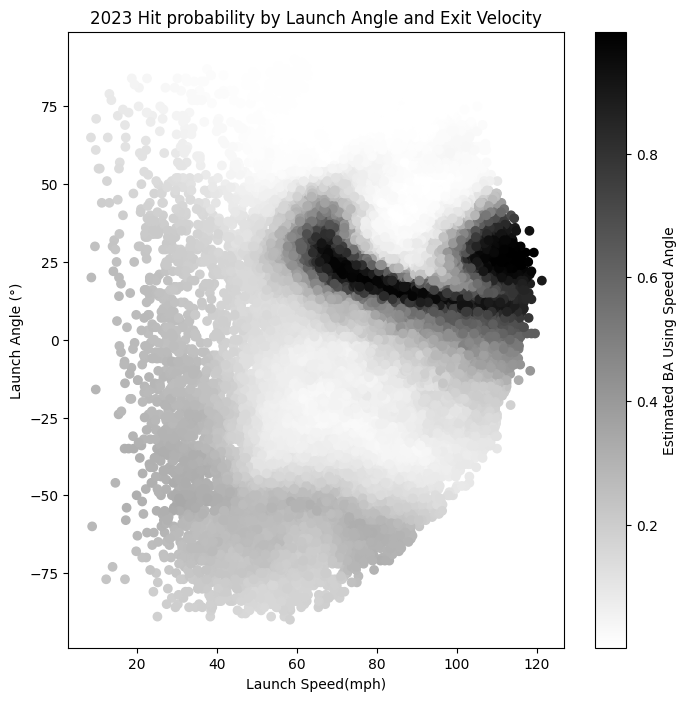

In [24]:
fig, ax = plt.subplots(figsize=(8, 8))
scatter = ax.scatter(data2['launch_speed'], data2['launch_angle'], c=data2['estimated_ba_using_speedangle'], cmap='binary')
ax.set_title("2023 Hit probability by Launch Angle and Exit Velocity")

cbar = plt.colorbar(scatter)
cbar.set_label('Estimated BA Using Speed Angle')
ax.set_xlabel("Launch Speed(mph)")
ax.set_ylabel("Launch Angle (°)")
plt.show()

/var/folders/5k/wdr6l04n13xbrtz6l93pdqmc0000gn/T/ipykernel_17477/1119045063.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['hr'] = data2.events=='home_run'


Text(0, 0.5, 'Launch Angle (°)')

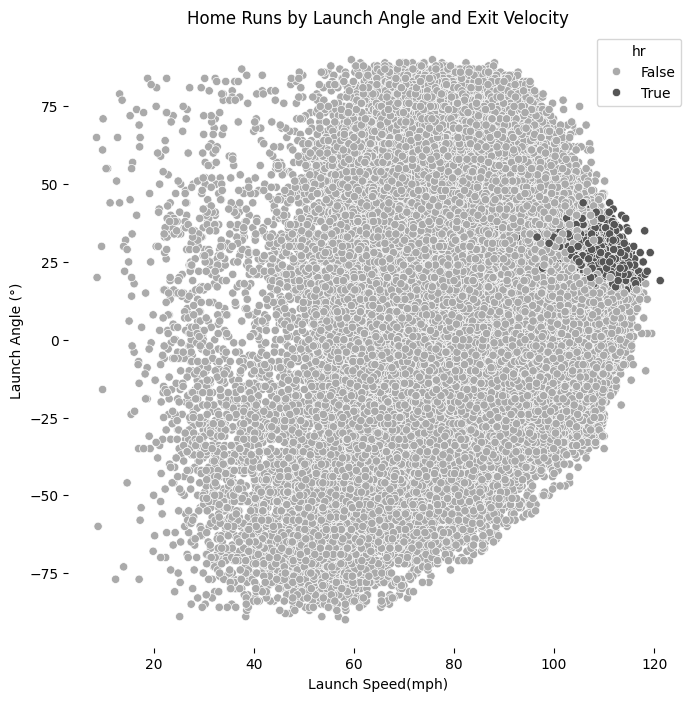

In [25]:
data2['hr'] = data2.events=='home_run'
fig, ax = plt.subplots(figsize=(8, 8))
sns.despine(fig, left=True, bottom=True)
sns.scatterplot(x="launch_speed", y="launch_angle",
                hue="hr", 
                palette='binary', 
                data=data2, ax=ax)

ax.set_title("Home Runs by Launch Angle and Exit Velocity")
ax.set_xlabel("Launch Speed(mph)")
ax.set_ylabel("Launch Angle (°)")

/var/folders/5k/wdr6l04n13xbrtz6l93pdqmc0000gn/T/ipykernel_17477/452284803.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = data2.groupby(pd.cut(data2.launch_speed, 100))


Text(0, 0.5, 'Expected wOBA Value')

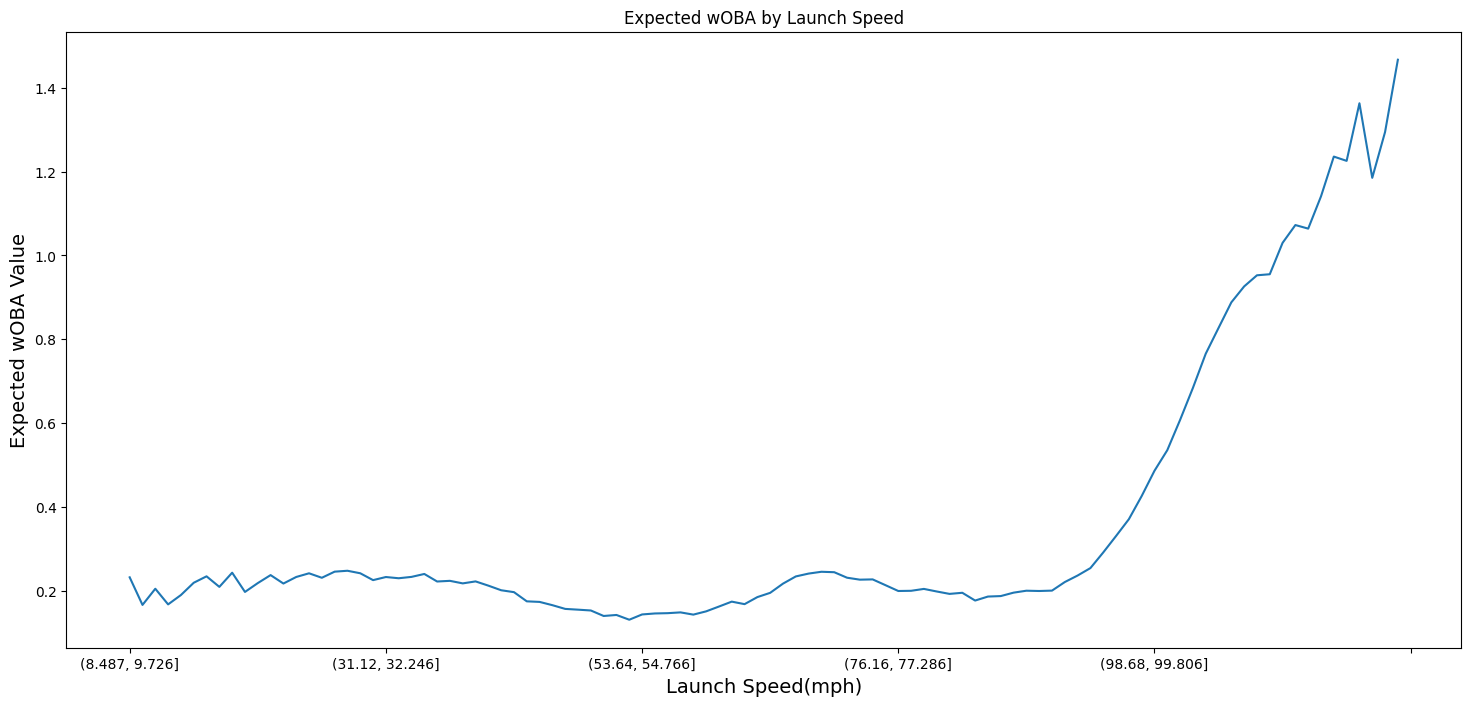

In [26]:
groups = data2.groupby(pd.cut(data2.launch_speed, 100))
fig, ax = plt.subplots(figsize=(18, 8))
ax = groups['estimated_woba_using_speedangle'].mean().plot()

ax.set_title("Expected wOBA by Launch Speed")
ax.set_xlabel('Launch Speed(mph)', fontsize=14)
ax.set_ylabel('Expected wOBA Value', fontsize=14)